#📌 Extracão

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
raw_df = pd.read_json(url)
print("Dimensão dos dados brutos:", raw_df.shape)
print(raw_df.head(2))


Dimensão dos dados brutos: (7267, 6)
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  


#🔧 Transformação

In [ ]:
df = pd.json_normalize(raw_df.to_dict(orient="records"))
print("Colunas do DataFrame após normalização:\n")
for col in df.columns:
    print(col)


Colunas do DataFrame após normalização:

customerID
Churn
customer.gender
customer.SeniorCitizen
customer.Partner
customer.Dependents
customer.tenure
phone.PhoneService
phone.MultipleLines
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies
account.Contract
account.PaperlessBilling
account.PaymentMethod
account.Charges.Monthly
account.Charges.Total


In [ ]:
rename_map = {
    "customerID": "ID_Cliente",
    "Churn": "Cancelou",
    "customer.gender": "Genero",
    "customer.SeniorCitizen": "Idoso",
    "customer.Partner": "Parceiro",
    "customer.Dependents": "Dependentes",
    "customer.tenure": "Meses_Permanencia",
    "phone.PhoneService": "Telefone",
    "phone.MultipleLines": "Multiplas_Linhas",
    "internet.InternetService": "Internet",
    "internet.OnlineSecurity": "Seguranca_Online",
    "internet.OnlineBackup": "Backup_Online",
    "internet.DeviceProtection": "Protecao_Dispositivo",
    "internet.TechSupport": "Suporte_Tecnico",
    "internet.StreamingTV": "Streaming_TV",
    "internet.StreamingMovies": "Streaming_Filmes",
    "account.Contract": "Contrato",
    "account.PaperlessBilling": "Fatura_Eletronica",
    "account.PaymentMethod": "Metodo_Pagamento",
    "account.Charges.Monthly": "Cobranca_Mensal",
    "account.Charges.Total": "Cobranca_Total"
}

df.rename(columns=rename_map, inplace=True)

In [ ]:
map_binario = {"Yes": "Sim", "No": "Não"}
df = df.replace(map_binario)

map_contrato = {
    "Month-to-month": "Mês a mês",
    "One year": "1 ano",
    "Two year": "2 anos"
}
df["Contrato"] = df["Contrato"].replace(map_contrato)

In [ ]:
df["Cobranca_Mensal"] = pd.to_numeric(df["Cobranca_Mensal"], errors="coerce")
df["Cobranca_Total"] = pd.to_numeric(df["Cobranca_Total"], errors="coerce")
df["Meses_Permanencia"] = pd.to_numeric(df["Meses_Permanencia"], errors="coerce")

In [ ]:
df["Cancelou"] = df["Cancelou"].map({"Sim": 1, "Não": 0})
df["Cancelou"] = df["Cancelou"].astype("Int64")

In [ ]:
print("Valores nulos por coluna:")
print(df.isna().sum())
df = df.dropna(subset=["Cobranca_Total"])

Valores nulos por coluna:
ID_Cliente                0
Cancelou                224
Genero                    0
Idoso                     0
Parceiro                  0
Dependentes               0
Meses_Permanencia         0
Telefone                  0
Multiplas_Linhas          0
Internet                  0
Seguranca_Online          0
Backup_Online             0
Protecao_Dispositivo      0
Suporte_Tecnico           0
Streaming_TV              0
Streaming_Filmes          0
Contrato                  0
Fatura_Eletronica         0
Metodo_Pagamento          0
Cobranca_Mensal           0
Cobranca_Total           11
dtype: int64


#📊 Carga e análise

In [ ]:
df.to_csv("TelecomX_Tratado.csv", index=False)
df.to_parquet("TelecomX_Tratado.parquet", index=False)

print("Pipeline ETL concluído com sucesso!")
print("Dimensão final:", df.shape)

Pipeline ETL concluído com sucesso!
Dimensão final: (7256, 21)


In [ ]:
print("\nDistribuição de Cancelamentos:")
print(df["Cancelou"].value_counts(normalize=True) * 100)



Distribuição de Cancelamentos:
Cancelou
0    73.421502
1    26.578498
Name: proportion, dtype: Float64


In [ ]:
print("\nEstatísticas dos valores numéricos:")
print(df[["Meses_Permanencia", "Cobranca_Mensal", "Cobranca_Total"]].describe())


Estatísticas dos valores numéricos:
       Meses_Permanencia  Cobranca_Mensal  Cobranca_Total
count        7256.000000      7256.000000     7256.000000
mean           32.395535        64.755423     2280.634213
std            24.558067        30.125739     2268.632997
min             1.000000        18.250000       18.800000
25%             9.000000        35.450000      400.225000
50%            29.000000        70.300000     1391.000000
75%            55.000000        89.900000     3785.300000
max            72.000000       118.750000     8684.800000


#📄Relatorio Final

[texto do link](https://)

🔹 1. Introdução

O presente relatório tem como objetivo analisar os dados da empresa TelecomX após um processo de ETL (Extração, Transformação e Carga). O foco principal é entender os padrões de cancelamento de clientes (churn) e como variáveis contratuais, demográficas e de serviços influenciam esse comportamento.

🔹 2. Pipeline ETL

Extração
Os dados foram extraídos de um arquivo JSON fornecido pela empresa.
Transformação
Normalização de colunas aninhadas.
Tradução e padronização de valores (Yes/No → Sim/Não).
Conversão de variáveis numéricas (Meses_Permanencia, Cobranca_Mensal, Cobranca_Total).
Criação da variável binária Cancelou (1 = cancelou, 0 = não cancelou).
Carga
Dados finais armazenados em .csv e .parquet para uso futuro.

/tmp/ipython-input-1266113730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["#66c2a5", "#fc8d62"])


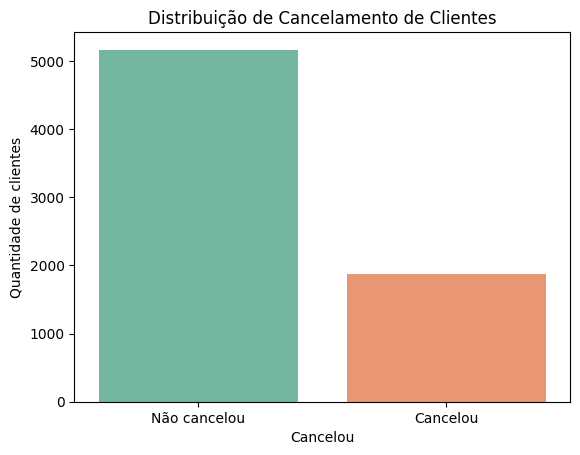

,count
Cancelou,
0,73.4%
1,26.6%


In [ ]:
churn_counts = df["Cancelou"].value_counts()

sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=["#66c2a5", "#fc8d62"])
plt.xticks([0,1], ["Não cancelou", "Cancelou"])
plt.ylabel("Quantidade de clientes")
plt.title("Distribuição de Cancelamento de Clientes")
plt.show()

(churn_counts / churn_counts.sum()).map("{:.1%}".format)

Aproximadamente 26% dos clientes cancelaram e 74% permaneceram.

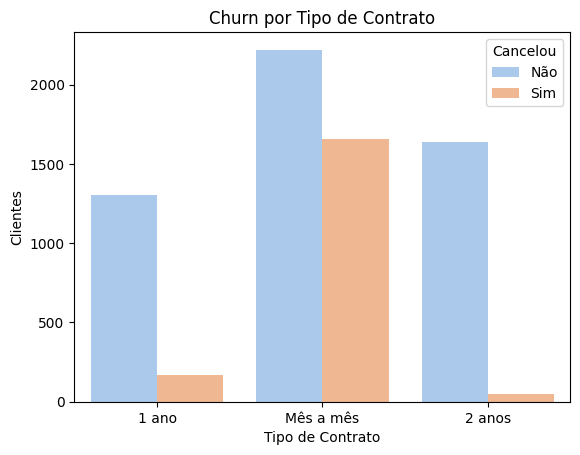

In [ ]:
sns.countplot(data=df, x="Contrato", hue="Cancelou", palette="pastel")
plt.title("Churn por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Clientes")
plt.legend(title="Cancelou", labels=["Não", "Sim"])
plt.show()

Clientes com contrato Mês a mês apresentam muito mais cancelamentos.

Contratos de 1 ano ou 2 anos têm churn muito menor, sugerindo maior fidelização.

/tmp/ipython-input-3123702987.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cancelou", y="Cobranca_Mensal", palette=["#8da0cb", "#e78ac3"])


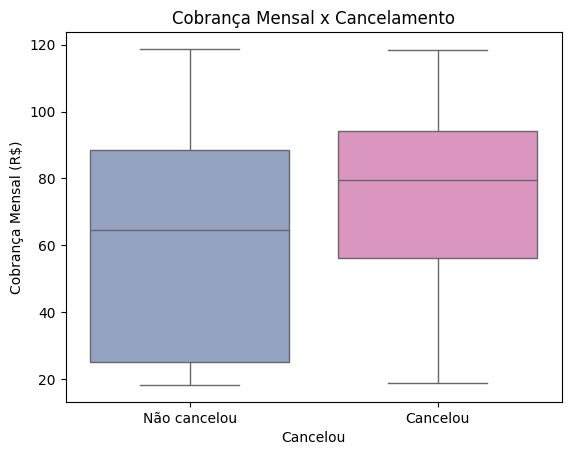

In [ ]:
sns.boxplot(data=df, x="Cancelou", y="Cobranca_Mensal", palette=["#8da0cb", "#e78ac3"])
plt.xticks([0,1], ["Não cancelou", "Cancelou"])
plt.ylabel("Cobrança Mensal (R$)")
plt.title("Cobrança Mensal x Cancelamento")
plt.show()

Clientes que pagam menos por mês cancelam com maior frequência.

Sugere que usuários de planos básicos estão menos satisfeitos ou menos engajados.

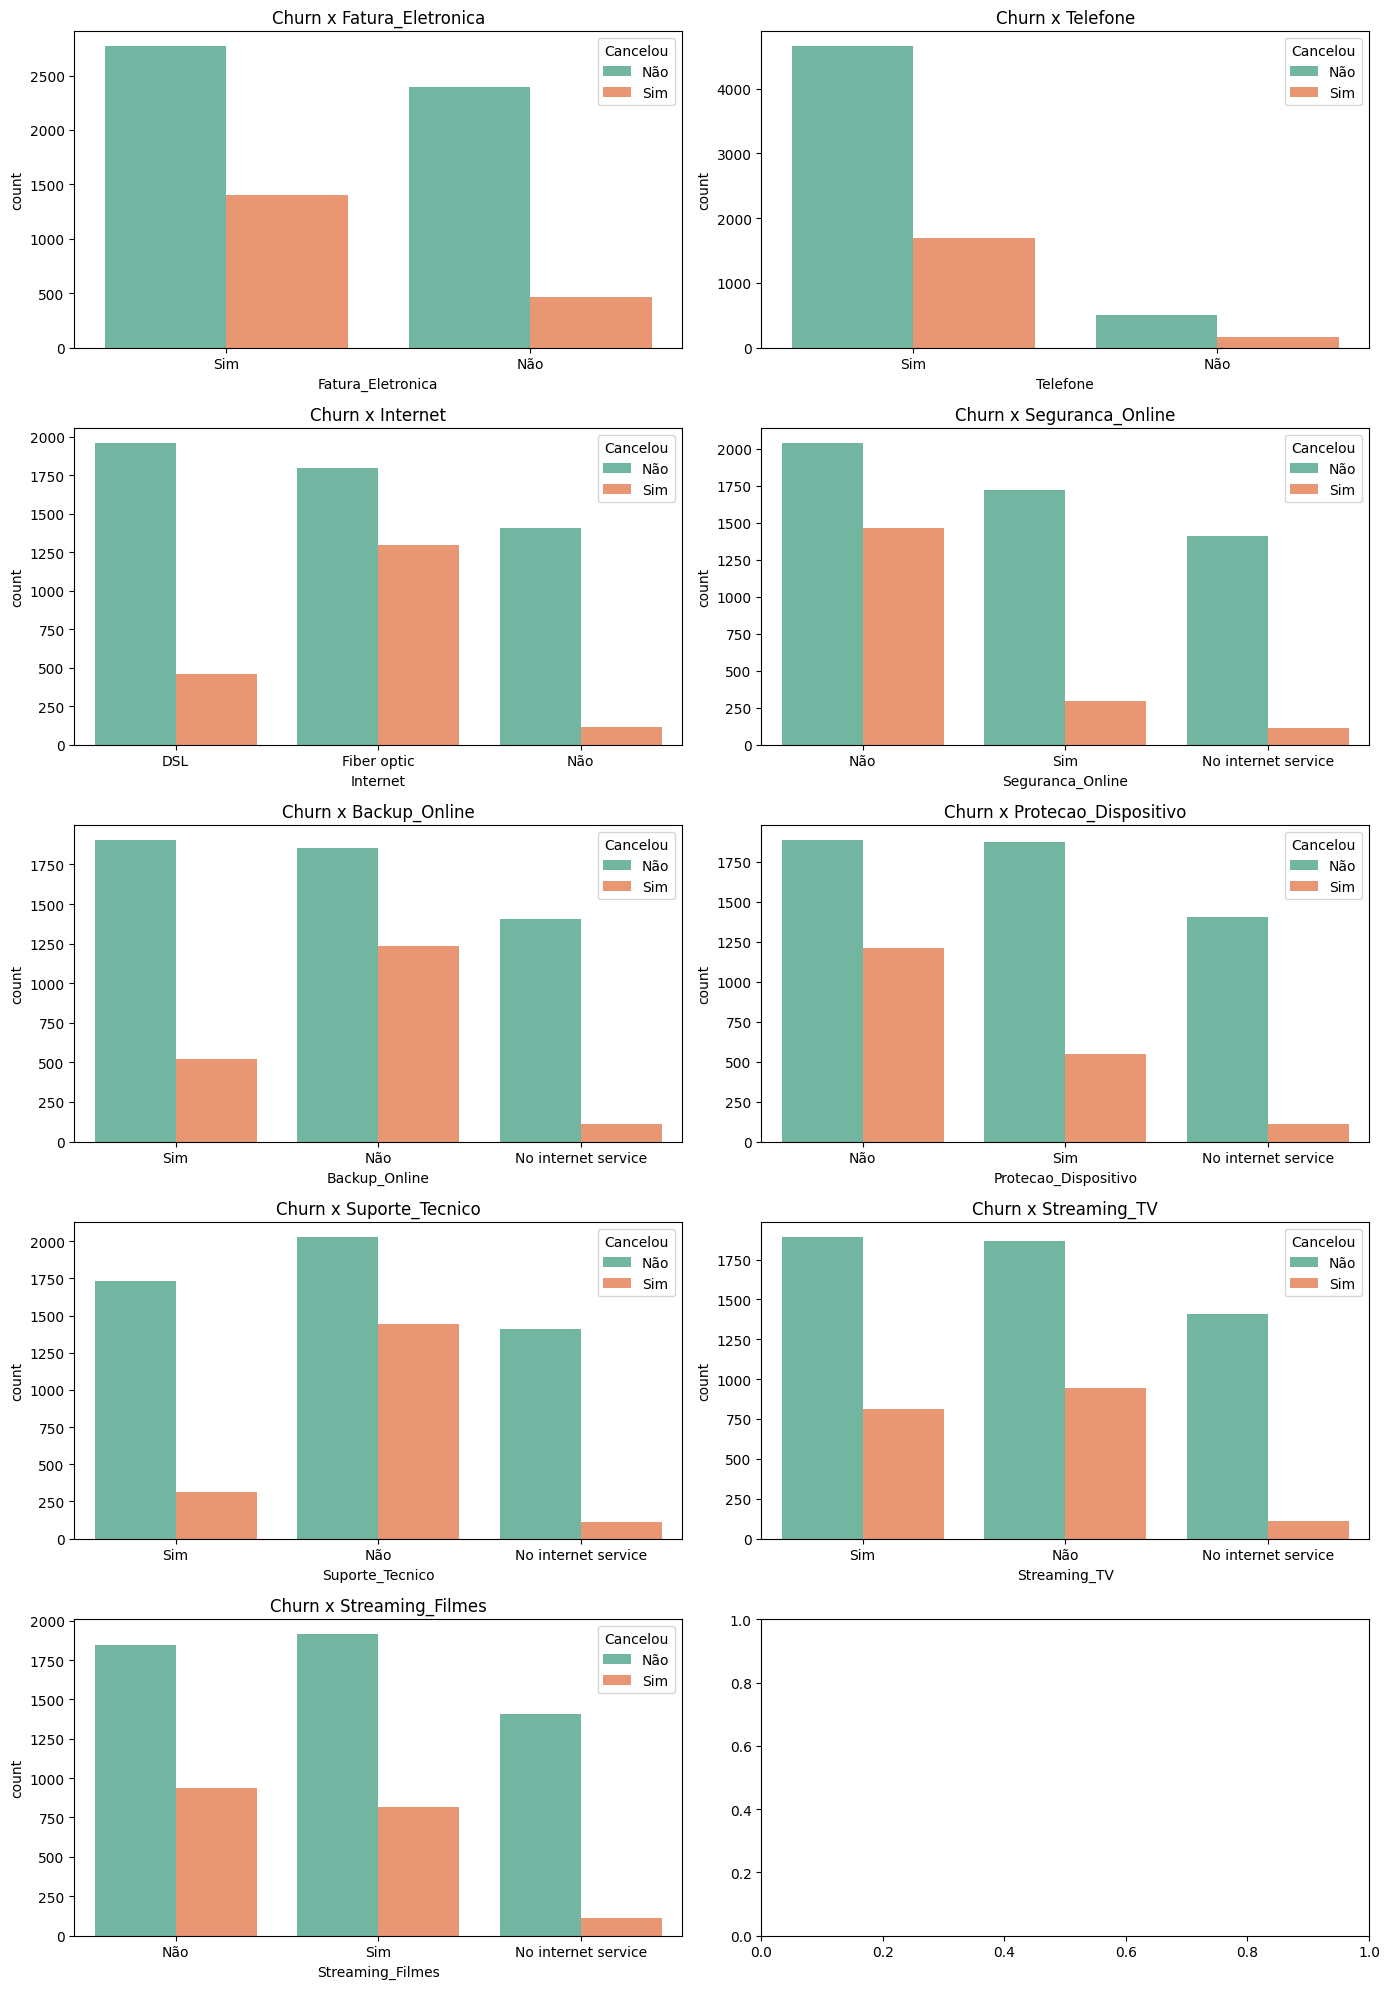

In [ ]:
servicos = ["Fatura_Eletronica","Telefone","Internet",
            "Seguranca_Online","Backup_Online","Protecao_Dispositivo",
            "Suporte_Tecnico","Streaming_TV","Streaming_Filmes"]

fig, axes = plt.subplots(5, 2, figsize=(14,20))
axes = axes.flatten()

for i, serv in enumerate(servicos):
    sns.countplot(data=df, x=serv, hue="Cancelou", ax=axes[i], palette="Set2")
    axes[i].set_title(f"Churn x {serv}")
    axes[i].legend(title="Cancelou", labels=["Não","Sim"])

plt.tight_layout()
plt.show()

Clientes sem serviços adicionais (backup, suporte, segurança) cancelam mais.

Quanto mais serviços extras contratados, menor a probabilidade de churn.

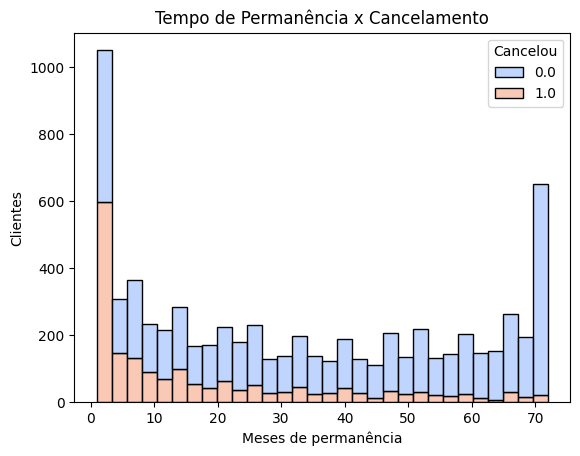

In [ ]:
sns.histplot(data=df, x="Meses_Permanencia", hue="Cancelou", multiple="stack", bins=30, palette="coolwarm")
plt.title("Tempo de Permanência x Cancelamento")
plt.xlabel("Meses de permanência")
plt.ylabel("Clientes")
plt.show()

Muitos cancelamentos ocorrem nos primeiros meses de contrato.

Após longos períodos (acima de 2 anos), a taxa de churn cai bastante.

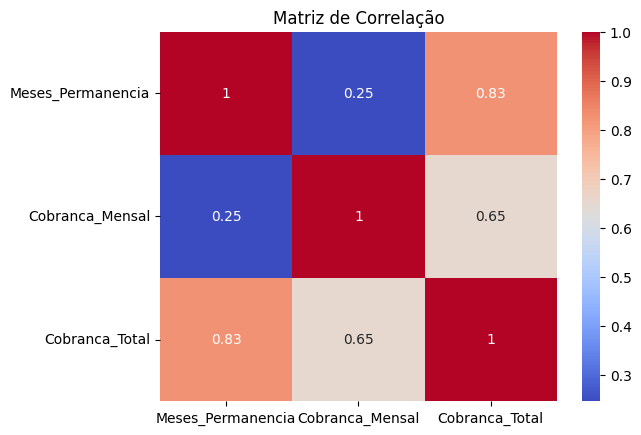

In [ ]:
num_cols = ["Meses_Permanencia", "Cobranca_Mensal", "Cobranca_Total"]
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

Cobranca_Total tem forte correlação positiva com Meses_Permanencia.

Clientes que ficam mais tempo, naturalmente acumulam mais cobranças.

In [ ]:
df.groupby("Cancelou")[["Meses_Permanencia","Cobranca_Mensal","Cobranca_Total"]].median()

,Meses_Permanencia,Cobranca_Mensal,Cobranca_Total
Cancelou,,,
0,38.0,64.45,1683.60
1,10.0,79.65,703.55


Resumo:

Quem cancelou ficou em média 1 ano ou menos.

Quem não cancelou costuma permanecer por mais tempo e gerar maior receita.

🔹 5. Conclusões e Recomendações

Planos Mês a Mês têm altíssima taxa de churn → incentivar upgrades para planos anuais.

Clientes com menos serviços contratados cancelam mais → oferecer pacotes de serviços extras pode aumentar retenção.

Primeiros meses críticos → importante criar campanhas de onboarding e suporte ao cliente logo no início.

Planos de baixo valor têm maior churn → sugerir planos de maior valor agregado com benefícios extras pode reduzir cancelamento.